In [1]:
cbecs <- read.csv("./data/cbecs2018_final_public.csv")

- `ELUSED` Electricity used 
- `ELCNS` Building/energy supplier variable: Annual electricity consumption (kWh)
- `NFLOOR` Number of floors

In [2]:
cbecs_elused <- cbecs[cbecs$ELUSED == 1, ]
cbecs_elused[cbecs_elused$NFLOOR == 994, "NFLOOR"] <- 12
cbecs_elused[cbecs_elused$NFLOOR == 995, "NFLOOR"] <- 20
table(cbecs_elused$NFLOOR)


   1    2    3    4    5    6    7    8    9   12   20 
2519 1364  711  421  273  179  126  122   90  278  274 

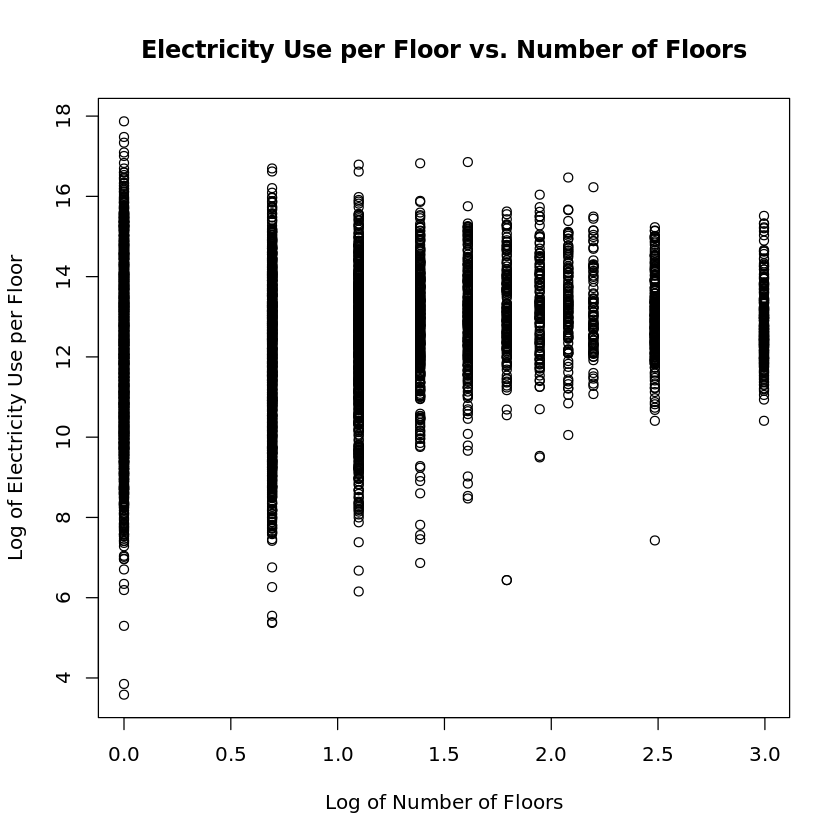

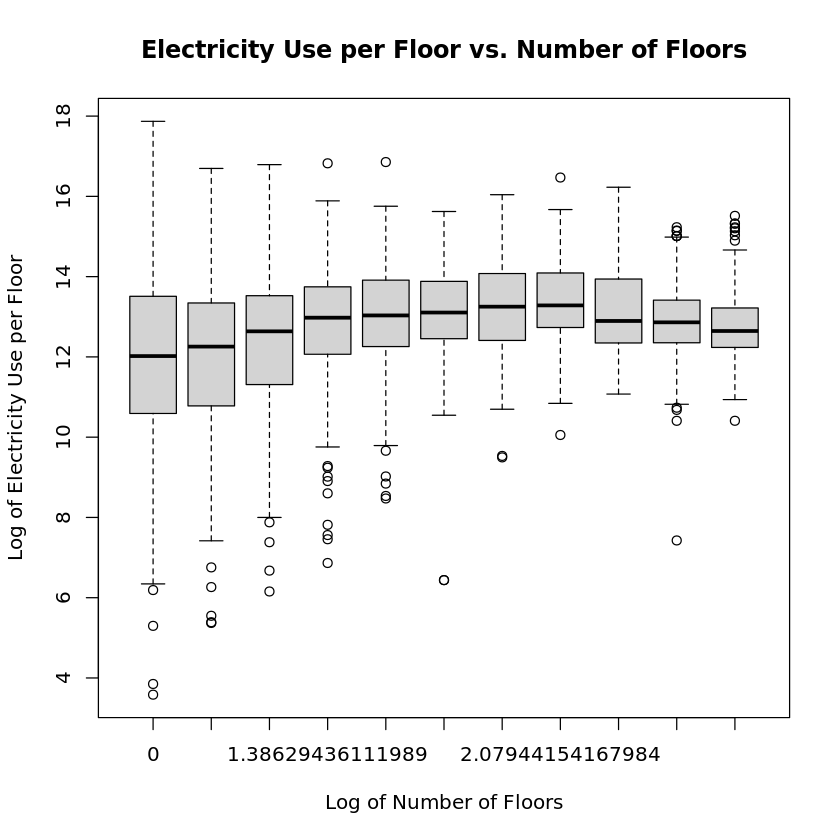

In [3]:
cbecs_elused$logecnf <- log(cbecs_elused$ELCNS / cbecs_elused$NFLOOR)
cbecs_elused$lognfloor <- log(cbecs_elused$NFLOOR)
# Plot of ennf vs. NFLOOR
plot(cbecs_elused$lognfloor, cbecs_elused$logecnf, xlab = "Log of Number of Floors", ylab = "Log of Electricity Use per Floor", main = "Electricity Use per Floor vs. Number of Floors")
# boxplot of logencf vs. lognfloor
boxplot(cbecs_elused$logecnf ~ cbecs_elused$lognfloor, xlab = "Log of Number of Floors", ylab = "Log of Electricity Use per Floor", main = "Electricity Use per Floor vs. Number of Floors")

In [4]:
model_lm <- lm(logecnf ~ lognfloor, data = cbecs_elused)
summary(model_lm)


Call:
lm(formula = logecnf ~ lognfloor, data = cbecs_elused)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4271 -1.0963  0.0637  1.1964  5.8595 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.01064    0.02998  400.58   <2e-16 ***
lognfloor    0.39869    0.02490   16.01   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.731 on 6355 degrees of freedom
Multiple R-squared:  0.03878,	Adjusted R-squared:  0.03863 
F-statistic: 256.4 on 1 and 6355 DF,  p-value: < 2.2e-16



Call:
lm(formula = logecnf ~ lognfloor, data = cbecs_elused_pba2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1756 -0.8020  0.0245  0.7963  5.2852 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.40970    0.06248   182.6   <2e-16 ***
lognfloor    0.58617    0.03710    15.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.357 on 1327 degrees of freedom
Multiple R-squared:  0.1583,	Adjusted R-squared:  0.1577 
F-statistic: 249.7 on 1 and 1327 DF,  p-value: < 2.2e-16


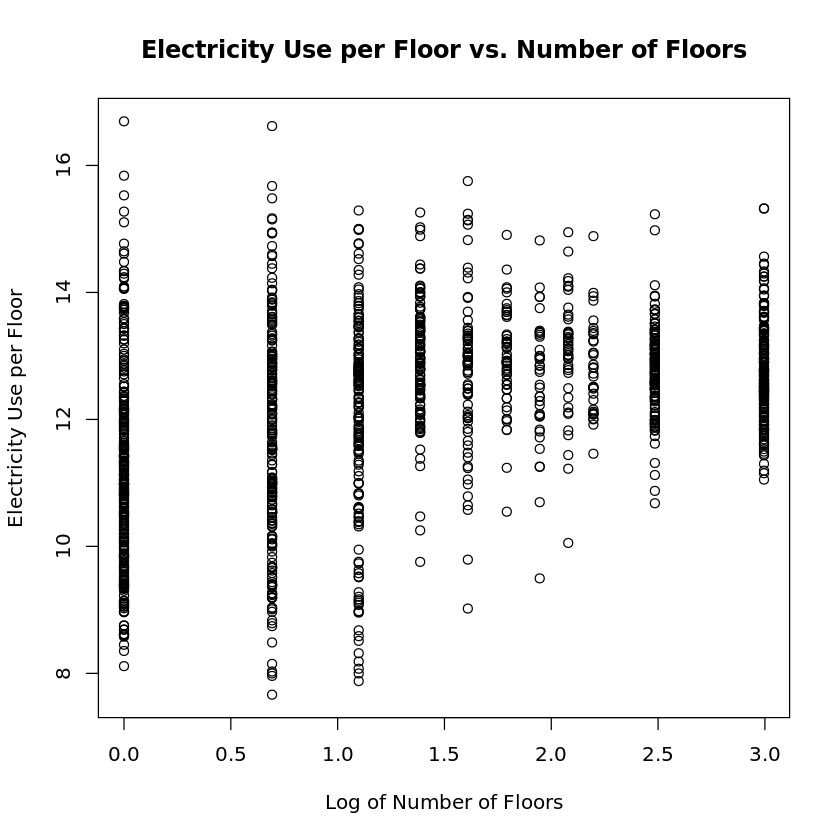

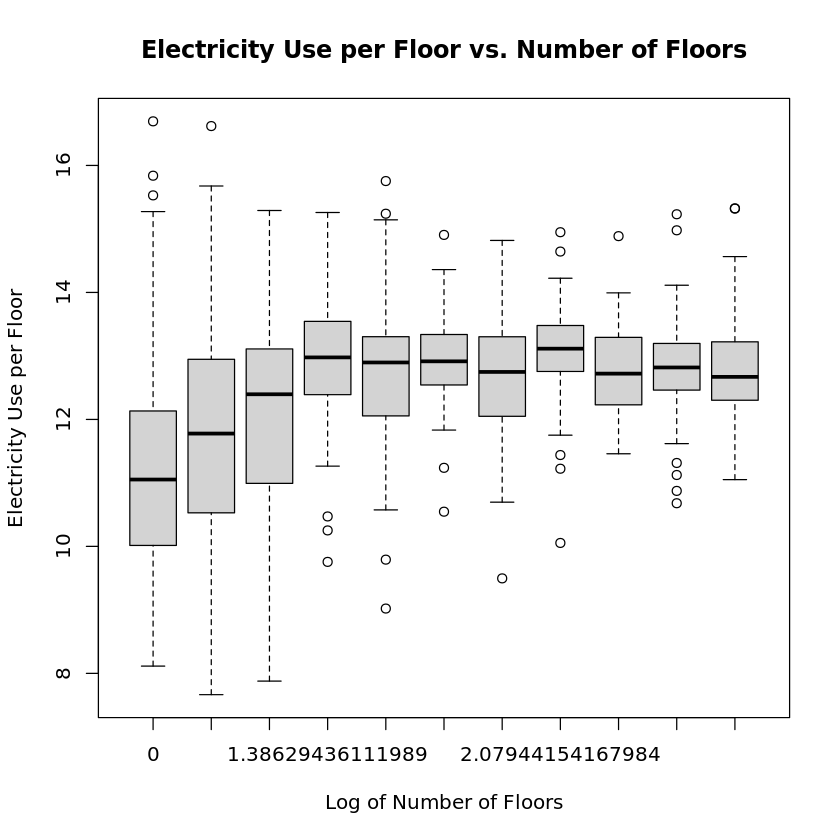

In [5]:
# Use data with PBA = 2
cbecs_elused_pba2 <- cbecs_elused[cbecs_elused$PBA == 2, ]
model_lm_pba2 <- lm(logecnf ~ lognfloor, data = cbecs_elused_pba2)
summary(model_lm_pba2) 
plot(cbecs_elused_pba2$lognfloor, cbecs_elused_pba2$logecnf, xlab = "Log of Number of Floors", ylab = "Electricity Use per Floor", main = "Electricity Use per Floor vs. Number of Floors")
# boxplot of logecnf by lognfloor
boxplot(cbecs_elused_pba2$logecnf ~ cbecs_elused_pba2$lognfloor, xlab = "Log of Number of Floors", ylab = "Electricity Use per Floor", main = "Electricity Use per Floor vs. Number of Floors")

In [6]:
# For each number of floors, find the outliers and assign their value to closest non-outlier
replace_outliers <- function(x) {
    Q1 <- quantile(x, 0.25, na.rm = TRUE)
    Q3 <- quantile(x, 0.75, na.rm = TRUE)
    IQR <- Q3 - Q1
    lower_bound <- Q1 - 1.5 * IQR
    upper_bound <- Q3 + 1.5 * IQR
    
    x[x < lower_bound] <- min(x[x >= lower_bound], na.rm = TRUE)
    x[x > upper_bound] <- max(x[x <= upper_bound], na.rm = TRUE)
    return(x)
}


library(dplyr)
cbecs_elused_pba2 <- cbecs_elused_pba2 %>%
    group_by(NFLOOR) %>%
    mutate(ecnf = replace_outliers(logecnf))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





Call:
lm(formula = logecnf ~ lognfloor, data = cbecs_elused_pba2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1756 -0.8020  0.0245  0.7963  5.2852 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.40970    0.06248   182.6   <2e-16 ***
lognfloor    0.58617    0.03710    15.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.357 on 1327 degrees of freedom
Multiple R-squared:  0.1583,	Adjusted R-squared:  0.1577 
F-statistic: 249.7 on 1 and 1327 DF,  p-value: < 2.2e-16


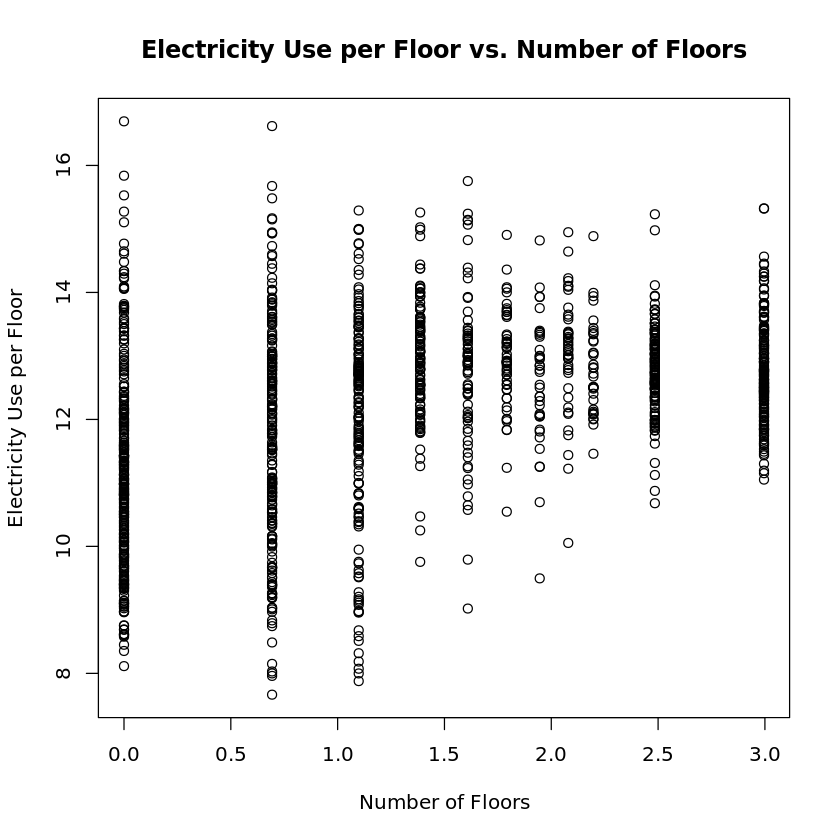

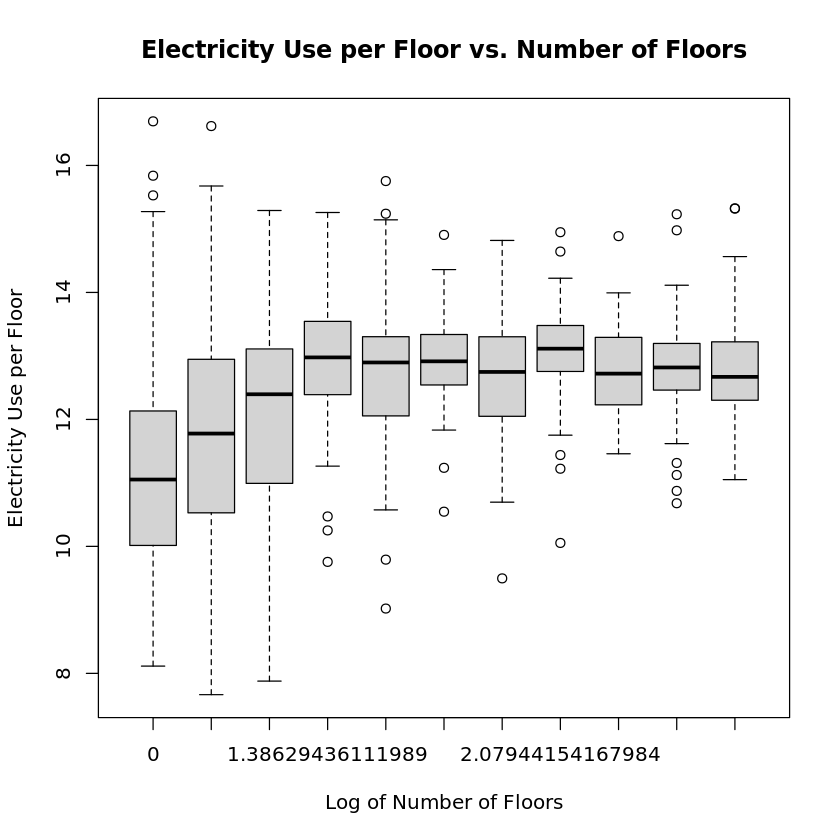

In [7]:
model_lm_pba2 <- lm(logecnf ~ lognfloor, data = cbecs_elused_pba2)
summary(model_lm_pba2)
plot(cbecs_elused_pba2$lognfloor, cbecs_elused_pba2$logecnf, xlab = "Number of Floors", ylab = "Electricity Use per Floor", main = "Electricity Use per Floor vs. Number of Floors")
boxplot(cbecs_elused_pba2$logecnf ~ cbecs_elused_pba2$lognfloor, xlab = "Log of Number of Floors", ylab = "Electricity Use per Floor", main = "Electricity Use per Floor vs. Number of Floors")

[1] 0.1796406

Warning message in anova.lmlist(object, ...):
“models with response ‘"NULL"’ removed because response differs from model 1”


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
lognfloor,1,459.5226,459.522598,249.6625,1.159061e-51
Residuals,1327,2442.4436,1.840575,NA,NA


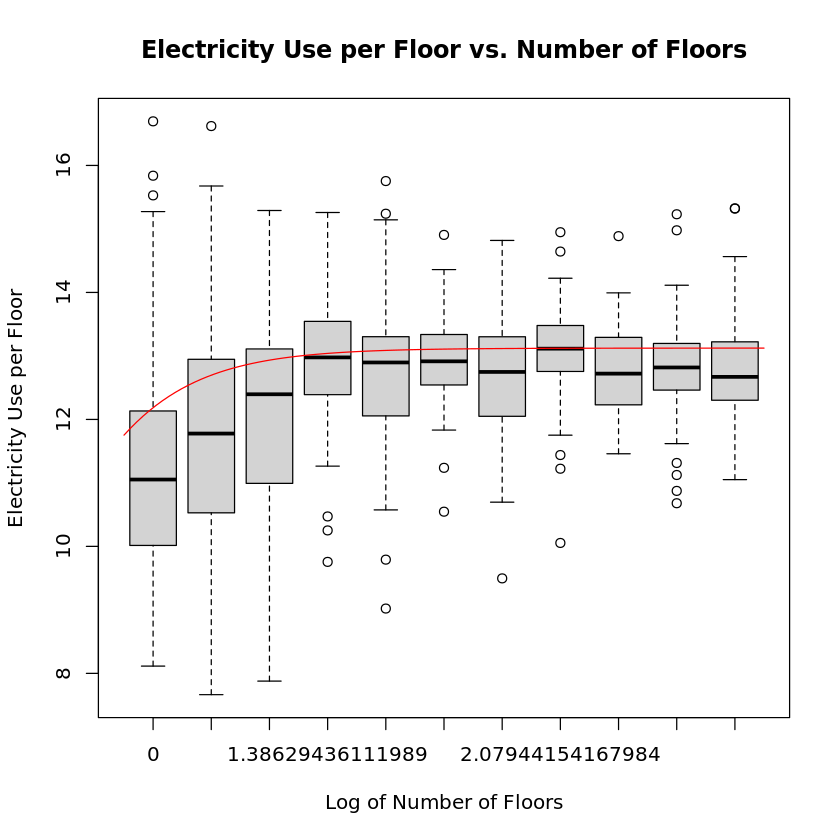

In [8]:
library(minpack.lm)
log_logistic_model <- function(x, a, b, c) {
    a / (1 + exp(-b * (x - c)))
}

start_values <- list(a = 10, b = 0.5, c = 0)

model_ll <- try(nlsLM(logecnf ~ log_logistic_model(lognfloor, a, b, c), 
                        data = cbecs_elused_pba2, 
                        start = start_values), silent = TRUE)

if(inherits(model_ll, "try-error")) {
    cat("Model failed to fit with the current start values.\n")
} else {
    summary(model_ll)
    
    rss <- sum(residuals(model_ll)^2)
    tss <- sum((cbecs_elused_pba2$logecnf - mean(cbecs_elused_pba2$logecnf, na.rm = TRUE))^2)
    rsq <- 1 - rss / tss
    rsq 
}

# plot(cbecs_elused_pba2$lognfloor, cbecs_elused_pba2$logecnf, xlab = "Log of Number of Floors", ylab = "Log of Electricity Use per Floor", main = "Electricity Use per Floor vs. Number of Floors")
boxplot(cbecs_elused_pba2$logecnf ~ cbecs_elused_pba2$lognfloor, xlab = "Log of Number of Floors", ylab = "Electricity Use per Floor", main = "Electricity Use per Floor vs. Number of Floors")
curve(log_logistic_model(x, a = coef(model_ll)[1], b = coef(model_ll)[2], c = coef(model_ll)[3]), add = TRUE, col = "red")

# Calculate the p-value 
anova(model_lm_pba2, model_ll)

[1] 0.1953022

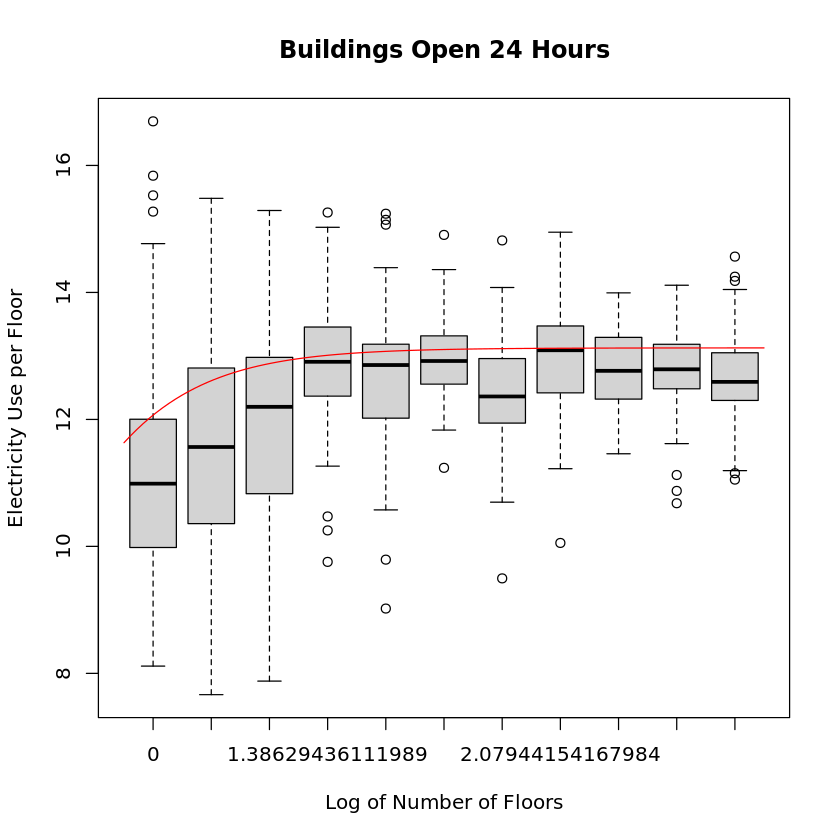

In [10]:
cbecs_elused_pba2_open242 <- cbecs_elused_pba2[cbecs_elused_pba2$OPEN24 == 2, ]
# Fit the model
model_ll_wlcns1 <- try(nlsLM(logecnf ~ log_logistic_model(lognfloor, a, b, c), 
                        data = cbecs_elused_pba2_open242, 
                        start = start_values), silent = TRUE)
tss = sum((cbecs_elused_pba2_open242$logecnf - mean(cbecs_elused_pba2_open242$logecnf, na.rm = TRUE))^2)
rss = sum(residuals(model_ll_wlcns1)^2)
rsq = 1 - rss / tss
rsq

# Plot the model
# plot(cbecs_elused_pba2_wlcns1$lognfloor, cbecs_elused_pba2_wlcns1$logecnf, xlab = "Log of Number of Floors", ylab = "Log of Electricity Use per Floor", main = "Electricity Use per Floor vs. Number of Floors")
boxplot(cbecs_elused_pba2_open242$logecnf ~ cbecs_elused_pba2_open242$lognfloor, xlab = "Log of Number of Floors", ylab = "Electricity Use per Floor", main = "Buildings Open 24 Hours")
curve(log_logistic_model(x, a = coef(model_ll_wlcns1)[1], b = coef(model_ll_wlcns1)[2], c = coef(model_ll_wlcns1)[3]), add = TRUE, col = "red")

[1] 0.1953022

Warning message in anova.lmlist(object, ...):
“models with response ‘"NULL"’ removed because response differs from model 1”


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
lognfloor,1,459.5226,459.522598,249.6625,1.159061e-51
Residuals,1327,2442.4436,1.840575,NA,NA


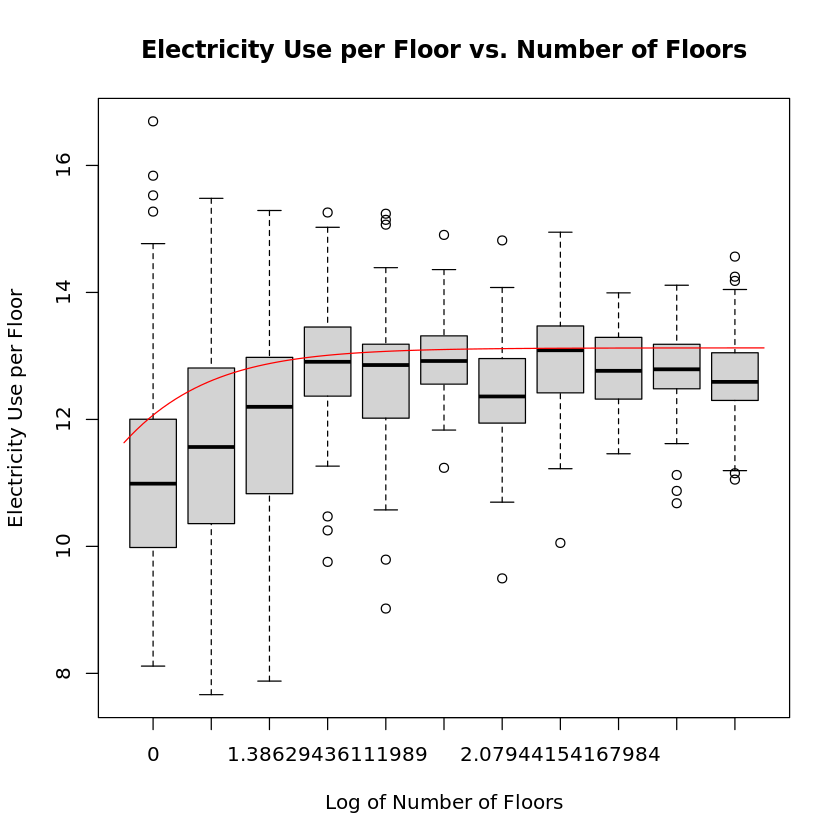

In [11]:
# Fit the model
model_ll_wlcns1 <- try(nlsLM(logecnf ~ log_logistic_model(lognfloor, a, b, c), 
                        data = cbecs_elused_pba2_open242, 
                        start = start_values), silent = TRUE)
tss = sum((cbecs_elused_pba2_open242$logecnf - mean(cbecs_elused_pba2_open242$logecnf, na.rm = TRUE))^2)
rss = sum(residuals(model_ll_wlcns1)^2)
rsq = 1 - rss / tss
rsq

# Plot the model
# plot(cbecs_elused_pba2_wlcns1$lognfloor, cbecs_elused_pba2_wlcns1$logecnf, xlab = "Log of Number of Floors", ylab = "Log of Electricity Use per Floor", main = "Electricity Use per Floor vs. Number of Floors")
boxplot(cbecs_elused_pba2_open242$logecnf ~ cbecs_elused_pba2_open242$lognfloor, xlab = "Log of Number of Floors", ylab = "Electricity Use per Floor", main = "Electricity Use per Floor vs. Number of Floors")
curve(log_logistic_model(x, a = coef(model_ll_wlcns1)[1], b = coef(model_ll_wlcns1)[2], c = coef(model_ll_wlcns1)[3]), add = TRUE, col = "red")


#p-value
anova(model_lm_pba2, model_ll_wlcns1)

In [ ]:
model_ed <- nlsLM(logecnf ~ exp_decay_model(lognfloor, a, b), data = cbecs_elused_pba2, start = list(a = 1, b = 0.1))

rss <- sum(residuals(model_ed)^2)
tss <- sum((cbecs_elused_pba2$logecnf - mean(cbecs_elused_pba2$logecnf))^2)
rsq <- 1 - rss / tss

df_total <- nrow(cbecs_elused_pba2) - 1
df_model <- length(coef(model_ed))
df_resid <- df_total - df_model

adj_rsq <- 1 - (1 - rsq) * (df_total / df_resid)

adj_rsq


[1] 0.2080455

Warning message in anova.lmlist(object, ...):
“models with response ‘"NULL"’ removed because response differs from model 1”


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
lognfloor,1,459.5226,459.522598,249.6625,1.159061e-51
Residuals,1327,2442.4436,1.840575,NA,NA


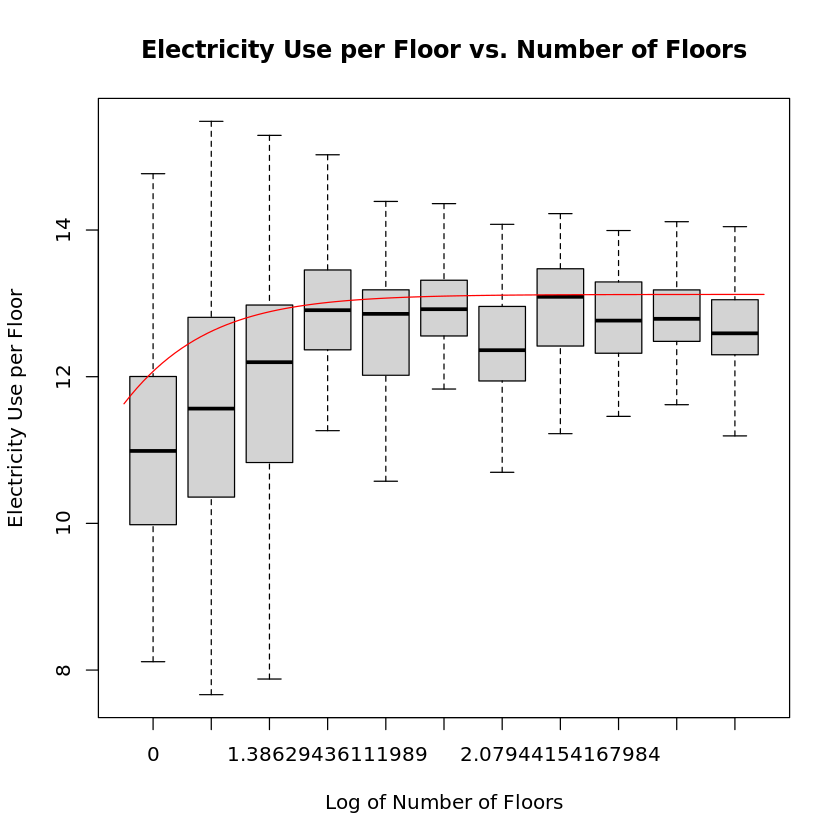

In [13]:
library(dplyr)

replace_outliers <- function(x) {
    Q1 <- quantile(x, 0.25, na.rm = TRUE)
    Q3 <- quantile(x, 0.75, na.rm = TRUE)
    IQR <- Q3 - Q1
    lower_bound <- Q1 - 1.5 * IQR
    upper_bound <- Q3 + 1.5 * IQR
    
    x[x < lower_bound] <- min(x[x >= lower_bound], na.rm = TRUE)
    x[x > upper_bound] <- max(x[x <= upper_bound], na.rm = TRUE)
    return(x)
}

cbecs_elused_pba2_open242 <- cbecs_elused_pba2_open242 %>%
    group_by(NFLOOR) %>%
    mutate(logecnf = replace_outliers(logecnf))

# Fit the model
model_ll_wlcns1 <- try(nlsLM(logecnf ~ log_logistic_model(lognfloor, a, b, c), 
                        data = cbecs_elused_pba2_open242, 
                        start = start_values), silent = TRUE)
tss = sum((cbecs_elused_pba2_open242$logecnf - mean(cbecs_elused_pba2_open242$logecnf, na.rm = TRUE))^2)
rss = sum(residuals(model_ll_wlcns1)^2)
rsq = 1 - rss / tss
rsq

# Plot the model
# plot(cbecs_elused_pba2_wlcns1$lognfloor, cbecs_elused_pba2_wlcns1$logecnf, xlab = "Log of Number of Floors", ylab = "Log of Electricity Use per Floor", main = "Electricity Use per Floor vs. Number of Floors")
boxplot(cbecs_elused_pba2_open242$logecnf ~ cbecs_elused_pba2_open242$lognfloor, xlab = "Log of Number of Floors", ylab = "Electricity Use per Floor", main = "Electricity Use per Floor vs. Number of Floors")
curve(log_logistic_model(x, a = coef(model_ll_wlcns1)[1], b = coef(model_ll_wlcns1)[2], c = coef(model_ll_wlcns1)[3]), add = TRUE, col = "red")

#p-value
anova(model_lm_pba2, model_ll_wlcns1)
